In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["patch.force_edgecolor"]=True
from plotly.offline import plot
import plotly.graph_objs as go
import plotly.plotly as py

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
df= pd.read_csv('globaltd.csv',encoding='ISO-8859-1',low_memory=False)

In [4]:
df.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.rename(columns={'iyear': 'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','city':'City',
                  'attacktype1_txt':'Type of Attack','targtype1_txt':'Target','target1':'Target Person','natlty1_txt':'Target Nationality',
                  'weaptype1_txt':'Weapon','gname':'Name of Group','nkill':'Killed','nwound':'Wounded','suicide':'Suicide','summary':'Summary'},inplace=True)

In [6]:
terror= df[['Year','Month','Day','Country','Region','City','Type of Attack','Target','Target Person','Target Nationality',
           'Weapon','Name of Group','Killed','Wounded','Suicide','latitude','longitude','Summary','motive']]


In [7]:
terror.isnull().sum()

Year                       0
Month                      0
Day                        0
Country                    0
Region                     0
City                     434
Type of Attack             0
Target                     0
Target Person            636
Target Nationality      1559
Weapon                     0
Name of Group              0
Killed                 10313
Wounded                16311
Suicide                    0
latitude                4556
longitude               4557
Summary                66129
motive                131130
dtype: int64

Text(0.5,1,'Missing Values by Columns')

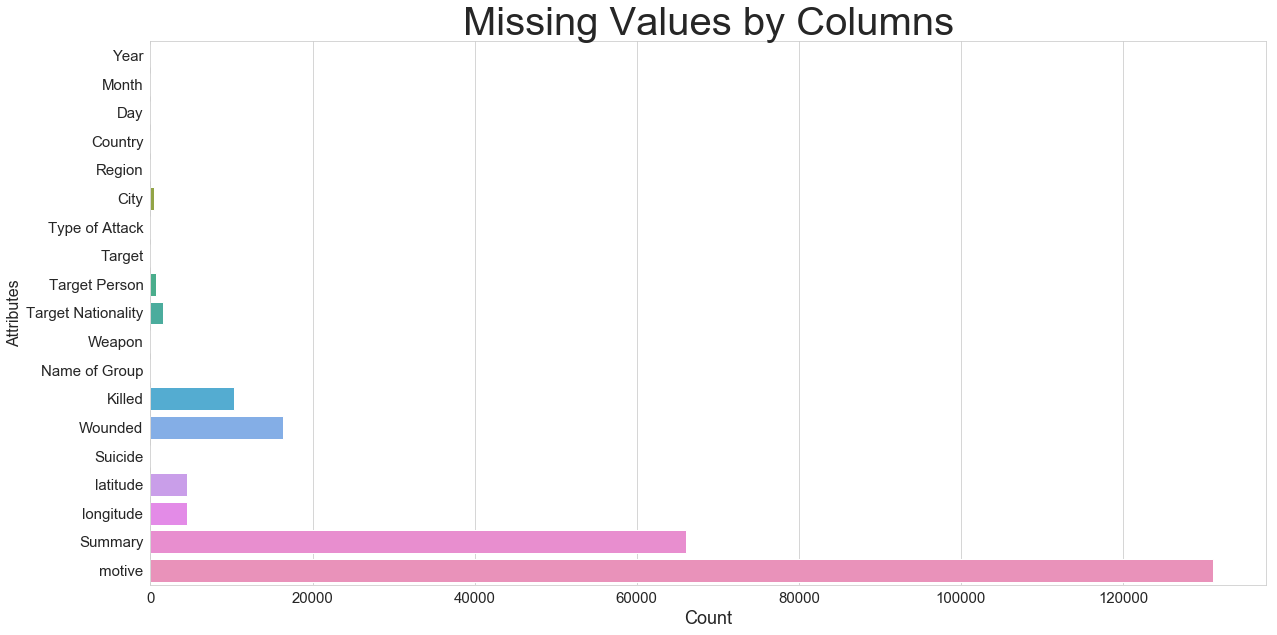

In [8]:
plt.figure(figsize=(20,10))
x= terror.isnull().sum()
y= terror.columns
sns.barplot(x,y)

plt.xlabel('Count', fontsize=18)
plt.ylabel('Attributes', fontsize=16)
plt.tick_params(axis='both',labelsize=15)
plt.title('Missing Values by Columns',fontdict={'fontsize':40})


Text(0.5,1,'Top Terrorist Attacks by City')

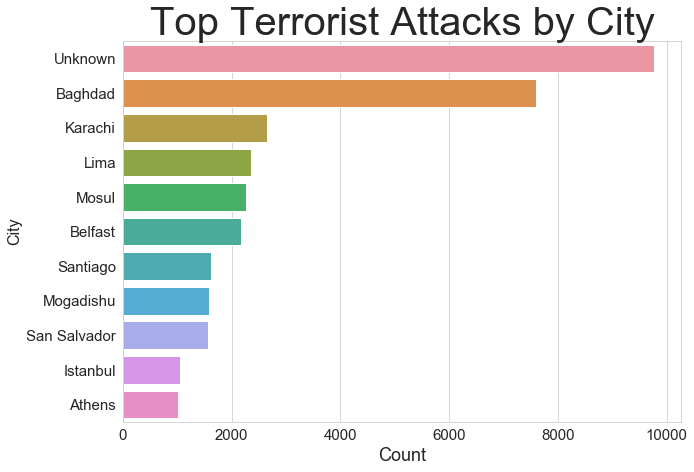

In [9]:
plt.figure(figsize=(10,7))
cityterror=terror['City'].value_counts().head(11)
sns.barplot(y=cityterror.index,x=cityterror.values)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=16)
plt.tick_params(axis='both',labelsize=15)
plt.title('Top Terrorist Attacks by City',fontdict={'fontsize':40})

In [10]:
khi = terror[terror['City']=='Karachi']

In [11]:
khi.isnull().sum()

Year                     0
Month                    0
Day                      0
Country                  0
Region                   0
City                     0
Type of Attack           0
Target                   0
Target Person            7
Target Nationality      42
Weapon                   0
Name of Group            0
Killed                  17
Wounded                 75
Suicide                  0
latitude                 1
longitude                1
Summary               1100
motive                1927
dtype: int64

In [12]:
## Data for karachi seems relatively adequate to perform analysis

In [13]:
khi.head(3)

,Year,Month,Day,Country,Region,City,Type of Attack,Target,Target Person,Target Nationality,Weapon,Name of Group,Killed,Wounded,Suicide,latitude,longitude,Summary,motive
585,1970,11,1,Pakistan,South Asia,Karachi,Assassination,Government (Diplomatic),Deputy Foreign Minister: Zygfryd Wolniak,Poland,Vehicle (not to include vehicle-borne explosiv...,Unknown,4.0,20.0,0,24.891115,67.143311,NaN,NaN
2217,1974,2,2,Pakistan,South Asia,Karachi,Bombing/Explosion,Maritime,Greek Freighter in Karachi,Greece,Firearms,Muslim Guerrillas,0.0,0.0,0,24.891115,67.143311,NaN,NaN
4181,1976,9,30,Pakistan,South Asia,Karachi,Facility/Infrastructure Attack,Airports & Aircraft,Syrian Arab Airlines office,Syria,Incendiary,Palestinians,0.0,1.0,0,24.891115,67.143311,NaN,NaN


In [14]:
kwg= khi.groupby('Year')[['Killed','Wounded']].sum()
trace1 = go.Bar(
    x=kwg.index,
    y=kwg.Killed,
    name='People Killed'
)
trace2 = go.Bar(
    x=kwg.index,
    y=kwg.Wounded,
    name='People Wounded'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title= 'People Killed/Wounded in Karachi Attacks')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

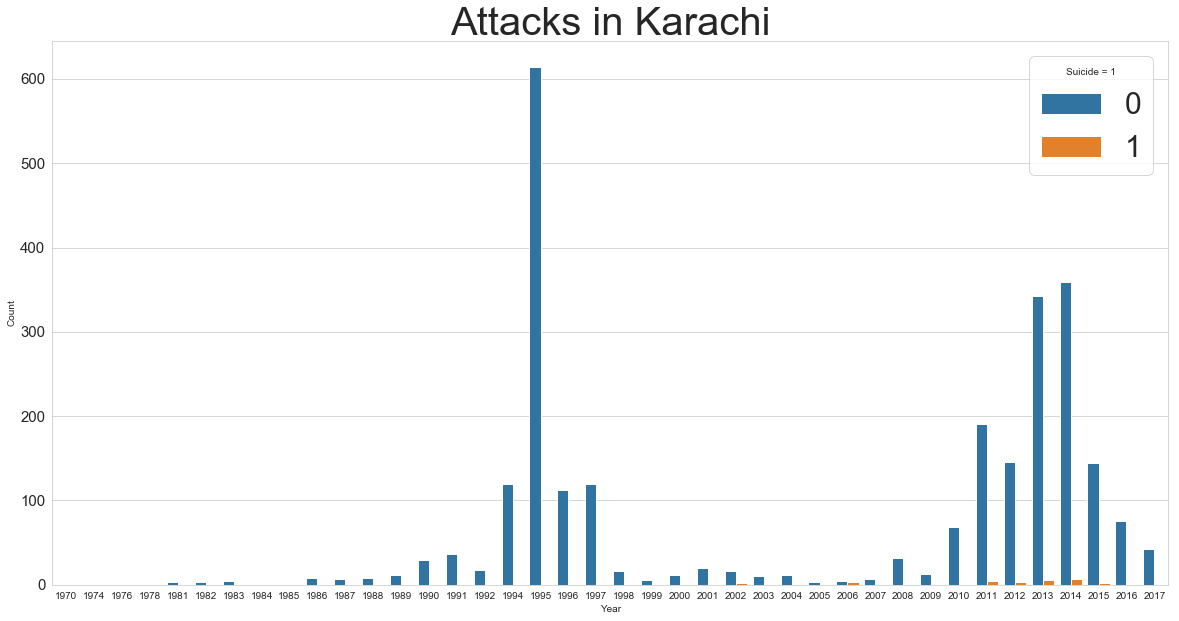

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year',hue='Suicide',data=khi)
plt.title('Attacks in Karachi',fontdict={'fontsize':40})
plt.tick_params(axis='y',labelsize=15)
plt.ylabel('Count', fontsize=10)
plt.legend(title='Suicide = 1',prop={'size':30})

In [16]:
## Most attacks were committed in 1995
## 90s and 2010s saw the highest number of attacks
## Suicide attacks only after 2000s

In [17]:
khis=khi[khi['Suicide']==1]

Text(0,0.5,'Count')

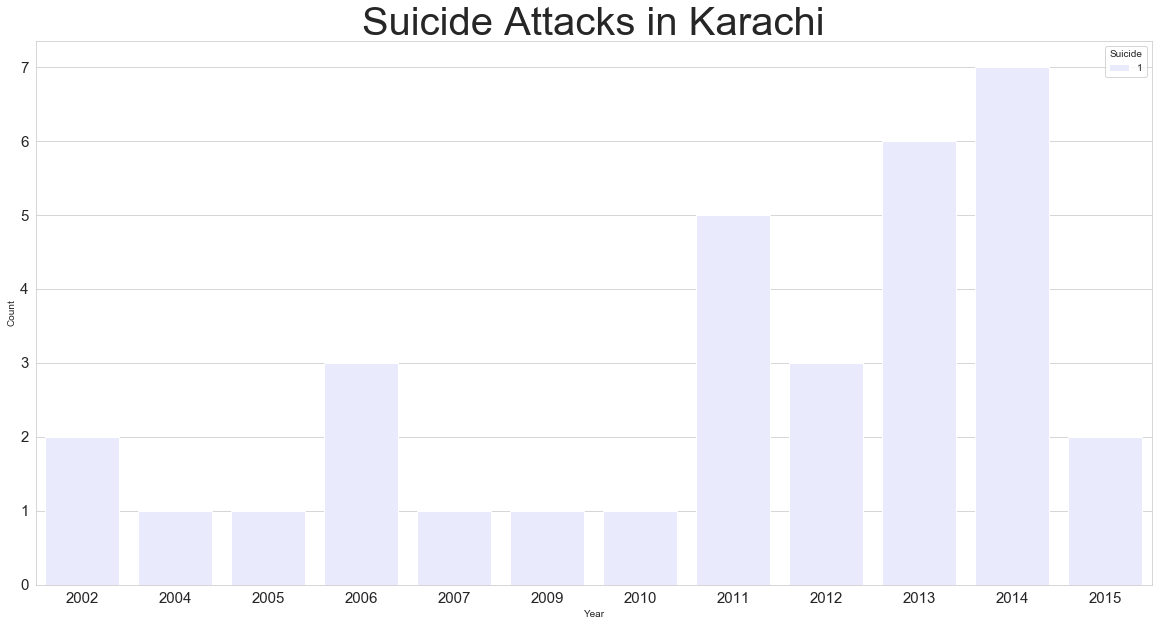

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year',hue='Suicide',data=khis,color='#eeefff')
plt.title('Suicide Attacks in Karachi',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.ylabel('Count', fontsize=10)


In [19]:
## Records in data base for suicide attacks only have data till 2015
## most recorded in 2014
## trend shows increasing attacks since 2002.

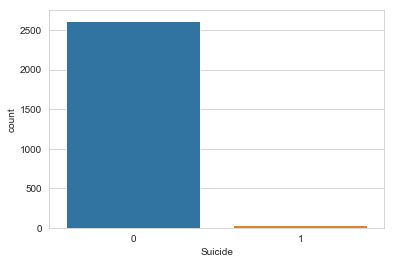

In [20]:
sns.countplot(x=khi['Suicide'])

In [21]:
## >95% attacks in karachi are classified as non suicidal attacks
## All suicide attacks were 2002 onwards

In [22]:
foreign= (khi[khi['Target Nationality'] != 'Pakistan']['Target Nationality']).value_counts()

In [23]:
foreign1= khi[khi['Target Nationality'] != 'Pakistan']

In [24]:
ff1= foreign1.groupby('Year')[['Killed','Wounded']].sum()
trace1 = go.Bar(
    x=ff1.index,
    y=ff1.Killed,
    name='People Killed'
)
trace2 = go.Bar(
    x=ff1.index,
    y=ff1.Wounded,
    name='People Wounded'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title= 'People(Foreign/Local) hurt in Karachi Attacks- (Foreign Nationals Targeted)')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

Text(0.5,1,'Nationalities Targeted in Karachi')

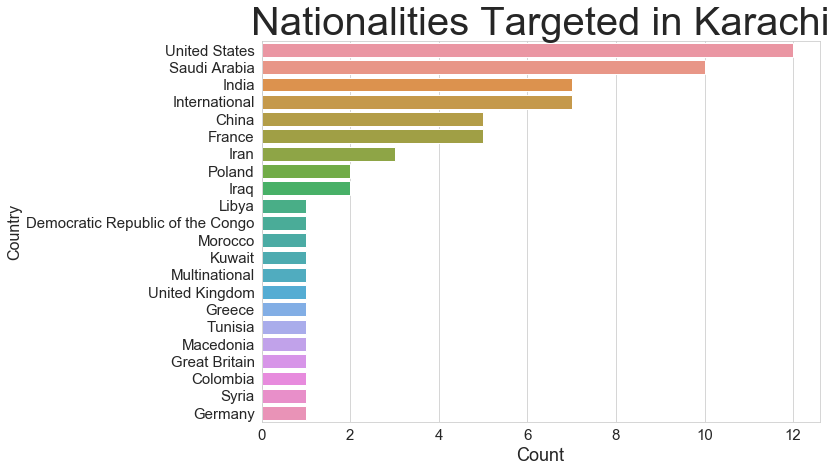

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(y=foreign.index,x=foreign.values)
plt.xlabel('Count', fontsize=18)
plt.ylabel('Country', fontsize=16)
plt.tick_params(axis='both',labelsize=15)
plt.title('Nationalities Targeted in Karachi',fontdict={'fontsize':40})

In [26]:
sui= khi[(khi['Target Nationality'] != 'Pakistan')&(khi['Suicide']==1)]


In [27]:
sui[['Year','Target','Target Person','Target Nationality','Name of Group','Killed','Wounded']]

,Year,Target,Target Person,Target Nationality,Name of Group,Killed,Wounded
74103,2002,Military,French military personnel in Pakistan,France,Al-Qaida,14.0,20.0
74257,2002,Government (Diplomatic),U.S. Embassy in Karachi,United States,Lashkar-e-Omar,12.0,51.0
80070,2006,Government (Diplomatic),Unknown,United States,Unknown,5.0,50.0


In [28]:
## 3 suicide attacks in which foreigners were targeted. 2 in 2002 and 1 in 2006.

In [29]:
ustarget= khi[khi['Target Nationality']== 'United States']
ustarget.head(3)

,Year,Month,Day,Country,Region,City,Type of Attack,Target,Target Person,Target Nationality,Weapon,Name of Group,Killed,Wounded,Suicide,latitude,longitude,Summary,motive
25724,1985,7,14,Pakistan,South Asia,Karachi,Bombing/Explosion,Airports & Aircraft,Pan American Airline Office,United States,Explosives,Iranians,0.0,1.0,0,24.891115,67.143311,NaN,NaN
28168,1986,5,27,Pakistan,South Asia,Karachi,Bombing/Explosion,Airports & Aircraft,Airline office (Pan Am),United States,Explosives,Unknown,1.0,4.0,0,24.891115,67.143311,NaN,NaN
29092,1986,9,5,Pakistan,South Asia,Karachi,Hijacking,Airports & Aircraft,NaN,United States,Firearms,Abu Nidal Organization (ANO),20.0,150.0,0,24.891115,67.143311,NaN,NaN


In [30]:
uss1= ustarget.groupby('Year')[['Killed','Wounded']].sum()
trace1 = go.Bar(
    x=uss1.index,
    y=uss1.Killed,
    name='People Killed'
)
trace2 = go.Bar(
    x=uss1.index,
    y=uss1.Wounded,
    name='People Wounded'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title= 'People(Foreign/Local) hurt in Karachi Attacks- (US Nationals Targeted)')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [31]:
## Above is a dataframe for all those attacks in which US nationals were targetted 

In [32]:
ustype= ustarget['Type of Attack'].value_counts()
trace = go.Pie(labels=ustype.index,values=ustype.values)
layout = go.Layout(title='Type of Attacks on US nationals')
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic_pie_chart1')

In [33]:
## Types of attacks on US targets

In [34]:
uskill= ustarget.groupby('Year')['Killed'].sum()

Text(0.5,1,'People killed by the targeting US nationals')

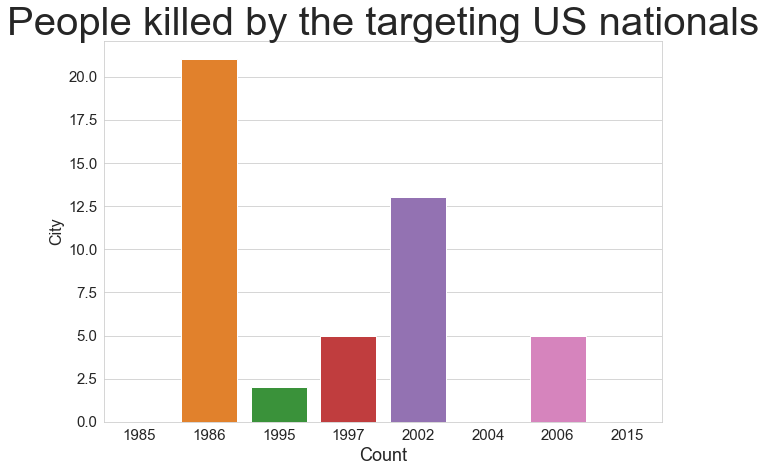

In [35]:
plt.figure(figsize=(10,7))
sns.barplot(y=uskill.values,x=uskill.index)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=16)
plt.tick_params(axis='both',labelsize=15)
plt.title('People killed by the targeting US nationals',fontdict={'fontsize':40})

In [36]:
uswound= ustarget.groupby('Year')['Wounded'].sum()

Text(0.5,1,'People Wounded by attacks targetting US nationals')

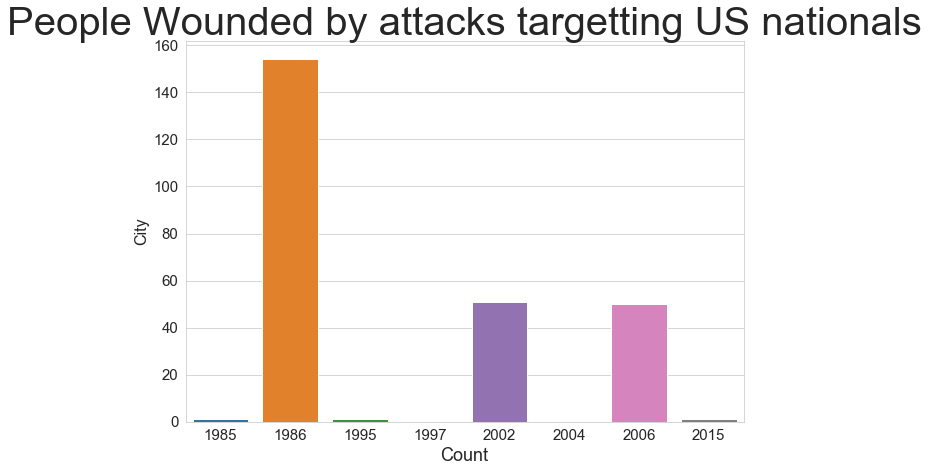

In [37]:
plt.figure(figsize=(10,7))
sns.barplot(y=uswound.values,x=uswound.index)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=16)
plt.tick_params(axis='both',labelsize=15)
plt.title('People Wounded by attacks targetting US nationals',fontdict={'fontsize':40})

In [38]:

ustype1=ustarget['Target'].value_counts()
trace = go.Pie(labels=ustype1.index,values=ustype1.values)
layout = go.Layout(title='Target of Attacks on US nationals')
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic_pie_chart21')

In [39]:
## Targets of attacks on US nationals in karachi
## The only 2 suicide attacks on US nationals were done on Government Diplomatic buildings

In [40]:
khi['Name of Group'].value_counts().head(10)

Unknown                                       2125
Muttahida Qami Movement (MQM)                  169
Tehrik-i-Taliban Pakistan (TTP)                138
Lashkar-e-Jhangvi                               30
Gunmen                                          21
Tehrik-e-Khilafat                               13
Al-Qaida in the Indian Subcontinent             11
Balochistan Liberation United Front (BLUF)       9
Sunni Muslim extremists                          9
Mohajir National Movement                        9
Name: Name of Group, dtype: int64

In [41]:
khigroup= (khi[khi['Name of Group'] != 'Unknown']['Name of Group']).value_counts().head(10)

Text(0.5,1,'Top Groups involved in attacks')

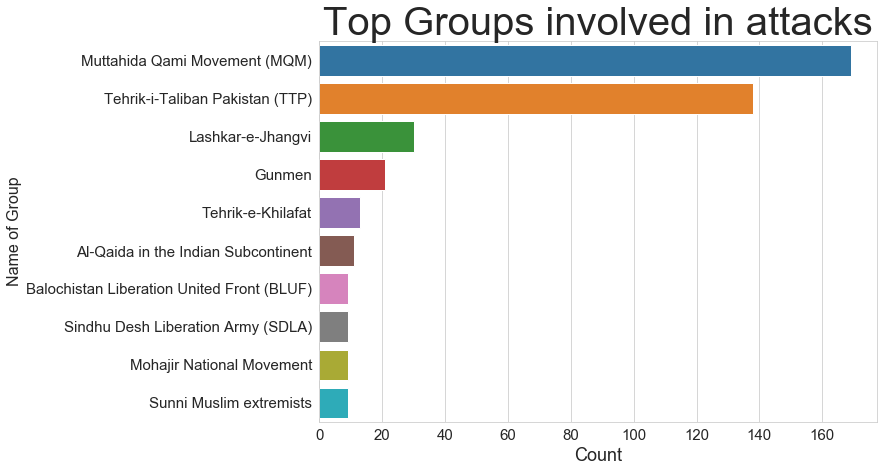

In [42]:
plt.figure(figsize=(10,7))
sns.barplot(y=khigroup.index,x=khigroup.values)
plt.xlabel('Count', fontsize=18)
plt.ylabel('Name of Group', fontsize=16)
plt.tick_params(axis='both',labelsize=15)
plt.title('Top Groups involved in attacks',fontdict={'fontsize':40})

In [43]:
## Interesting to see MQM at number 2
## MQM claims to be a national political party that has often placed itself in top 5 parties of the country
## Need to see what type of attacks this political party was involved in its headquarters Karachi

In [44]:
mqm= khi[khi['Name of Group'] == 'Muttahida Qami Movement (MQM)']
mqm.head(3)

,Year,Month,Day,Country,Region,City,Type of Attack,Target,Target Person,Target Nationality,Weapon,Name of Group,Killed,Wounded,Suicide,latitude,longitude,Summary,motive
42724,1990,5,31,Pakistan,South Asia,Karachi,Armed Assault,Government (General),Govt Bus and Bus Stop,Pakistan,Firearms,Muttahida Qami Movement (MQM),21.0,35.0,0,24.891115,67.143311,NaN,NaN
47770,1991,8,17,Pakistan,South Asia,Karachi,Armed Assault,Violent Political Party,Former Prime Minister: Benazir Bhutto,Pakistan,Firearms,Muttahida Qami Movement (MQM),0.0,3.0,0,24.891115,67.143311,NaN,NaN
55075,1994,2,3,Pakistan,South Asia,Karachi,Armed Assault,Transportation,Commercial Bus,Pakistan,Firearms,Muttahida Qami Movement (MQM),1.0,2.0,0,24.891115,67.143311,NaN,NaN


In [45]:
trace = go.Pie(labels=mqm['Target'])
layout = go.Layout(title='Target of Attacks by MQM')
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic_pie_chart1')


In [46]:
trace = go.Pie(labels=mqm['Type of Attack'])
layout = go.Layout(title='Types of Attacks by MQM')
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic_pie_chart2')

In [47]:
trace = go.Pie(labels=mqm['Weapon'])
layout = go.Layout(title='Types of Weapons used by MQM')
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic_pie_chart2')

In [48]:
mqm['Killed'].value_counts().sum()

169

In [49]:
## 169 recorded fatilities by MQM.. 
## This political party appears to be more violent than the biggest terrorist organization in the country

In [50]:
mqm['Suicide'].value_counts()

0    169
Name: Suicide, dtype: int64

In [51]:
## No suicide attacks by MQM

In [52]:
## Moving on to TTP- Tehrik e Taliban Pakista, the most notorious and dangerous terrorist outfit in the country.
## TTP does not take part in elections like MQM does.

In [53]:
ttp = khi[khi['Name of Group'] == 'Tehrik-i-Taliban Pakistan (TTP)']

In [54]:
ttp['Suicide'].value_counts()

0    123
1     15
Name: Suicide, dtype: int64

In [55]:
## 15 suicide attacks recorded for TTP in Karachi.( data only records suicide attacks up till 2015)

In [56]:
trace = go.Pie(labels=ttp['Target'])
layout = go.Layout(title='Target of Attacks by TTP')
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic_pie_chart5')


In [57]:
## TTP attacks almost everyone in the city
## Law enforcement agencies- Police and Army make up half of their targets

In [58]:
trace = go.Pie(labels=ttp['Type of Attack'])
layout = go.Layout(title='Types of Attacks by TTP')
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic_pie_chart25')

In [59]:
## TTPs signature style of attacks appears to be bombings/explosions.

In [60]:
trace = go.Pie(labels=ttp['Weapon'])
layout = go.Layout(title='Types of Weapons used by TTP')
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic_pie_chart2')

In [61]:
## TTP only likes to use explosives and firarms 

In [62]:
ttp.head(3)

,Year,Month,Day,Country,Region,City,Type of Attack,Target,Target Person,Target Nationality,Weapon,Name of Group,Killed,Wounded,Suicide,latitude,longitude,Summary,motive
93618,2009,9,14,Pakistan,South Asia,Karachi,Armed Assault,Business,The target of the attack was a security guard.,Pakistan,Firearms,Tehrik-i-Taliban Pakistan (TTP),1.0,0.0,0,24.891115,67.143311,"09/14/2009: On Monday, in Karachi, Sindh, Paki...",The specific motive for the attack is unknown.
94854,2009,12,28,Pakistan,South Asia,Karachi,Bombing/Explosion,Private Citizens & Property,The Shia religious procession,Pakistan,Explosives,Tehrik-i-Taliban Pakistan (TTP),45.0,100.0,1,24.891115,67.143311,"12/28/2009: On Monday, after 1600, a Shia reli...",The specific motive for the attack is unknown.
95714,2010,3,14,Pakistan,South Asia,Karachi,Hostage Taking (Kidnapping),Business,A property dealer was targeted in the attack.,Pakistan,Firearms,Tehrik-i-Taliban Pakistan (TTP),1.0,1.0,0,24.891115,67.143311,"03/14/2010: On Sunday, in Manghopir Police Sta...",The specific motive for the attack is unknown.


In [63]:
ttp['Killed'].sum()

446.0

In [64]:
ttp['Wounded'].sum()

1004.0

In [65]:
## 446 fatalities and over 1000 were wounded by TTP- the most violent and dangerous terrorist organization in the country

In [66]:
ttp1= ttp.groupby('Year')[['Killed','Wounded']].sum()
trace1 = go.Bar(
    x=ttp1.index,
    y=ttp1.Killed,
    name='People Killed'
)
trace2 = go.Bar(
    x=ttp1.index,
    y=ttp1.Wounded,
    name='People Wounded'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title= 'People hurt in Karachi Attacks by Tehreek-e-Taliban Pakistan(TTP)')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [67]:
mqm1= mqm.groupby('Year')[['Killed','Wounded']].sum()
trace1 = go.Bar(
    x=mqm1.index,
    y=mqm1.Killed,
    name='People Killed'
)
trace2 = go.Bar(
    x=mqm1.index,
    y=mqm1.Wounded,
    name='People Wounded'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title= 'People hurt in Karachi Attacks by MQM')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [68]:
ukn = khi[khi['Name of Group'] == 'Unknown']
ukn1= ukn.groupby('Year')[['Killed','Wounded']].sum()
trace1 = go.Bar(
    x=ukn1.index,
    y=ukn1.Killed,
    name='People Killed'
)
trace2 = go.Bar(
    x=ukn1.index,
    y=ukn1.Wounded,
    name='People Wounded'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title= 'People hurt in Karachi Attacks by Unknown Groups')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [69]:

yo= (khi.groupby('Name of Group')['Killed'].sum()).sort_values(ascending=False).head(15)

In [70]:
trace = go.Pie(labels=yo.index,values=yo.values)
layout = go.Layout(title='Groups responsible for fatalities above 10')
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic_pie_chart2')

In [71]:
## TTP tops the list for recorded fatalities

In [72]:
we=khi['Target'].value_counts()

In [73]:
trace = go.Pie(labels=we.index,values=we.values)
layout = go.Layout(title='Targets in Karachi')
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic_pie_chart2')

In [74]:
## Private Citizens and Property are the most susceptible,vulnerable and most frequent targets in the city

In [75]:
pvt= khi[khi['Target'] == 'Private Citizens & Property']
pvt1= pvt.groupby('Year')[['Killed','Wounded']].sum()
trace1 = go.Bar(
    x=pvt1.index,
    y=pvt1.Killed,
    name='People Killed'
)
trace2 = go.Bar(
    x=pvt1.index,
    y=pvt1.Wounded,
    name='People Wounded'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title= 'People hurt by attacks on Private Citizens and Property')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [76]:
ass= khi[khi['Type of Attack'] == 'Assassination']
ass1= ass.groupby('Year')[['Killed','Wounded']].sum()
trace1 = go.Bar(
    x=ass1.index,
    y=ass1.Killed,
    name='People Killed'
)
trace2 = go.Bar(
    x=ass1.index,
    y=ass1.Wounded,
    name='People Wounded'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title= 'People hurt by Assassinations')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [77]:
exp= khi[khi['Type of Attack']=='Bombing/Explosion']
exp1= exp.groupby('Year')[['Killed','Wounded']].sum()
trace1 = go.Bar(
    x=exp1.index,
    y=exp1.Killed,
    name='People Killed'
)
trace2 = go.Bar(
    x=exp1.index,
    y=exp1.Wounded,
    name='People Wounded'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title= 'People hurt by Improvised Explosive Devices')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')
